# 시각화
1. 업종 분류별 수요 차이: barplot
2. 범주형: 기업명, 업종분류, 기업형태, 주소
    - 모든 범주형 데이터 분포 확인: barplot
3. 연속형: 사원수, 설립연도, 매출액, 직급
    - 모든 연속형 데이터 분포 확인: histogram or barplot
4. 이용하는기술스택/우대사항 내 Dev(DevOps), 쿠버네티스(Kubernetis), 컨테이너, 도커, Amazon EKS, Amazon K8S 빈도수 확인: barplot -> hue='업종분류'
5. 직무, 이용하는기술스택/우대사항, 자격요건
    - 워드클라우드

In [2]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv('data_res.csv', index_col = 0)
data.drop_duplicates(inplace = True)

In [4]:
categorical = data[['기업명' , '업종분류', '기업형태', '주소']]
numeric = data[['사원수' , '설립연도', '매출액', '직급']]
wc = data[['직무', '이용하는기술스택/우대사항', '자격요건']]

## 연속형
- columns = '사원수' , '설립연도', '매출액', '직급'
    - 분포확인: barplot, hisplot

### 매출액

In [10]:
data2 = data.copy()
data2.매출액.fillna(0, inplace=True)

In [11]:
money_len1 = len(data2[(data2['매출액'] >= 0) & (data2['매출액'] < 10000)])
money_len2 = len(data2[(data2['매출액'] >= 10000) & (data2['매출액'] < 100000)])
money_len3 = len(data2[(data2['매출액'] >= 100000) & (data2['매출액'] < 1000000)])
money_len4 = len(data2[(data2['매출액'] >= 1000000) & (data2['매출액'] < 10000000)])
money_len5 = len(data2[(data2['매출액'] >= 10000000) & (data2['매출액'] < 100000000)])
money_len6 = len(data2[(data2['매출액'] >= 100000000) & (data2['매출액'] < 1000000000)])

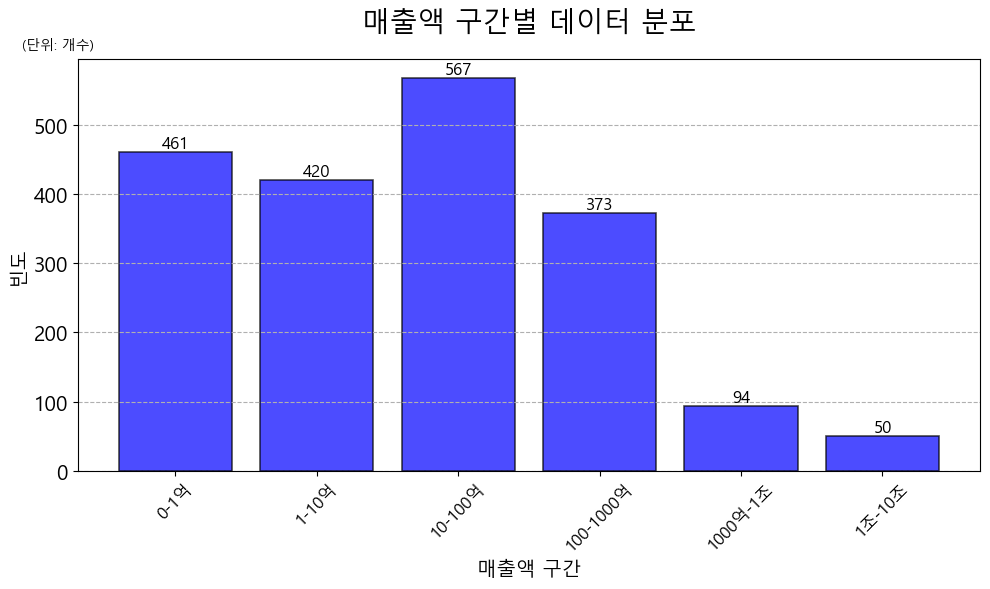

In [28]:
# 매출액 구간 (문자열로 표현)
categories = ['0-1억', '1-10억', '10-100억', '100-1000억', '1000억-1조', '1조-10조']
# 각 구간별 데이터 개수
counts = [money_len1, money_len2, money_len3, money_len4, money_len5, money_len6]

plt.figure(figsize=(10, 6))  # 그래프의 크기 설정
hist4 = plt.bar(categories, counts, color='blue', edgecolor='black', linewidth=1.2, alpha=0.7)  # 막대 그래프 생성

plt.xlabel('매출액 구간', fontsize=14, color='black')
plt.ylabel('빈도', fontsize=14, color='black')
plt.title('매출액 구간별 데이터 분포', fontsize=20, color='black', pad=20)
plt.xticks(fontsize=12, color='black', rotation=45)  # x축 레이블 회전
plt.yticks(fontsize=15, color='black')
plt.grid(axis='y', linestyle='--')  # y축 격자 설정
plt.tight_layout()  # 그래프와 레이블 간격 조정
plt.annotate('(단위: 개수)', xy=(0, 1), xytext=(-40, 15), xycoords='axes fraction', textcoords='offset points', ha='left', va='top', fontsize = 10)  # y축 단위 추가
# 막대 위에 빈도수 표시
for p in hist4.patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
             fontsize=12, color='black', ha='center', va='bottom')
plt.savefig('매출액 barplot', dpi=300)
plt.show()

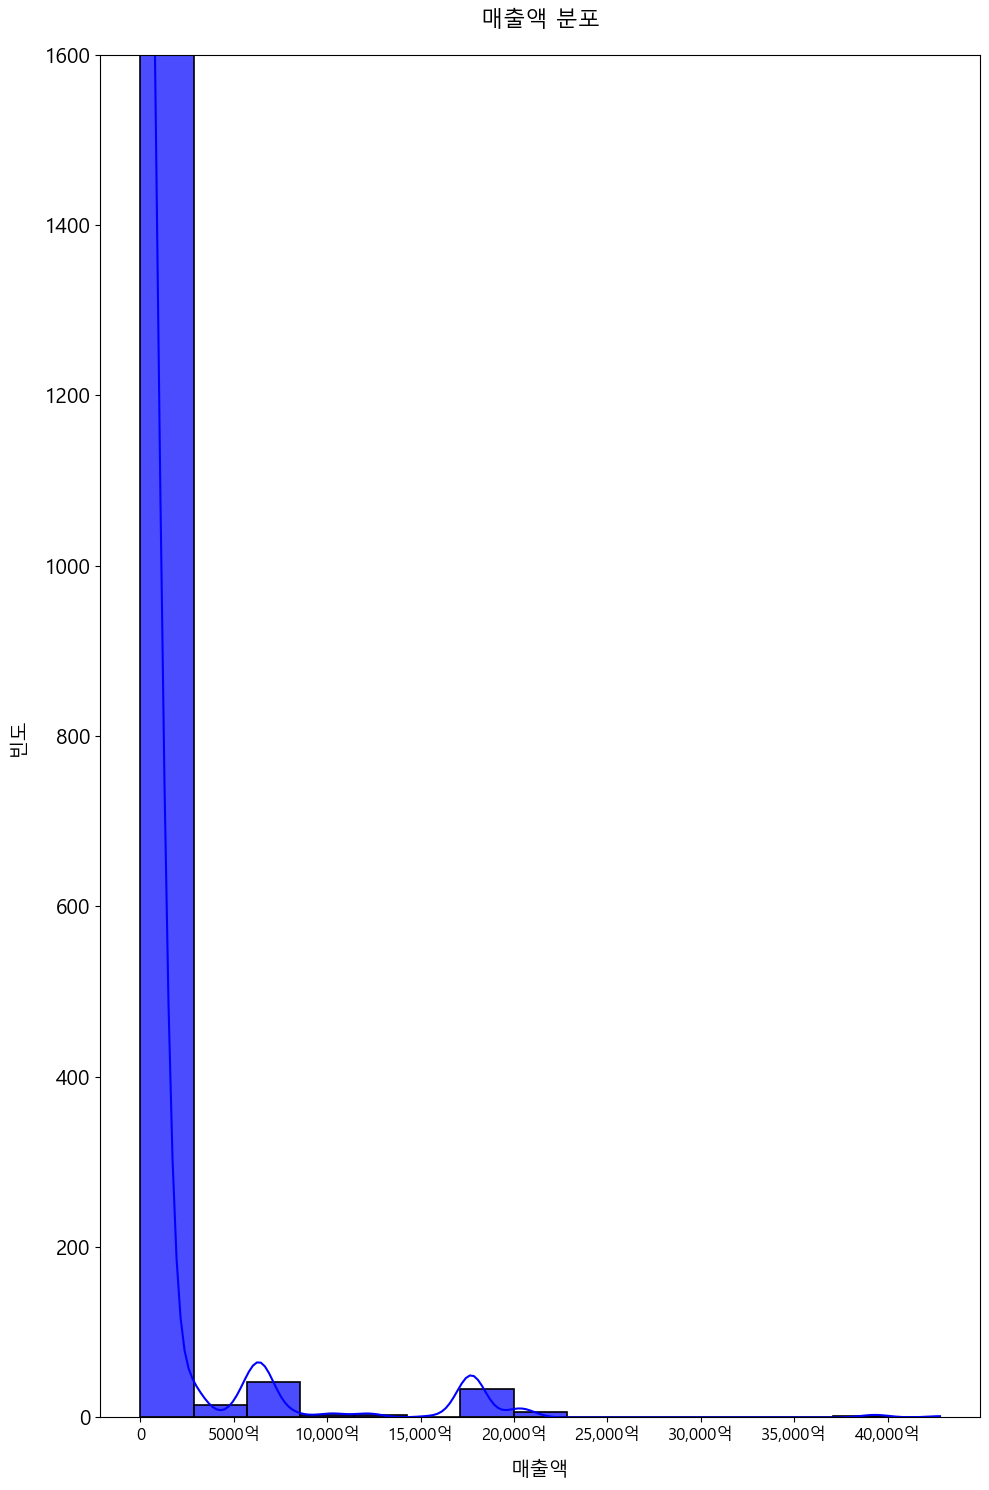

In [13]:
# 히스토그램 그리기
plt.figure(figsize=(10, 15))  # 그래프의 크기 조정
hist2 = sns.histplot(data=data['매출액'], bins=15, kde=True, color='blue', edgecolor='black', linewidth=1.2, alpha=0.7)  # 히스토그램 스타일 설정
plt.xlabel('매출액', fontsize=14, color='black', labelpad=12)  # x축 레이블 설정
plt.ylabel('빈도', fontsize=14, color='black', labelpad=12)  # y축 레이블 설정
plt.title('매출액 분포', fontsize=16, color='black', pad=20)  # 제목 설정
plt.xticks(fontsize=12, color='black', ticks=[0, 5e7, 1e8, 1.5e8, 2e8, 2.5e8, 3e8, 3.5e8, 4e8], labels=['0', '5000억', '10,000억', '15,000억', '20,000억','25,000억', '30,000억', '35,000억', '40,000억'])
plt.yticks(fontsize=15, color='black')  # y축 눈금 레이블 설정
plt.ylim(0, 1600)
plt.tight_layout()  # 그래프와 레이블 간격 조정
# 그래프를 이미지 파일로 저장
# plt.savefig('histogram.png', dpi=300, bbox_inches='tight')  # 이미지 파일로 저장 (dpi: 해상도, bbox_inches='tight': 그래프와 레이블이 잘린 부분을 제거)

plt.show()

### 설립연도

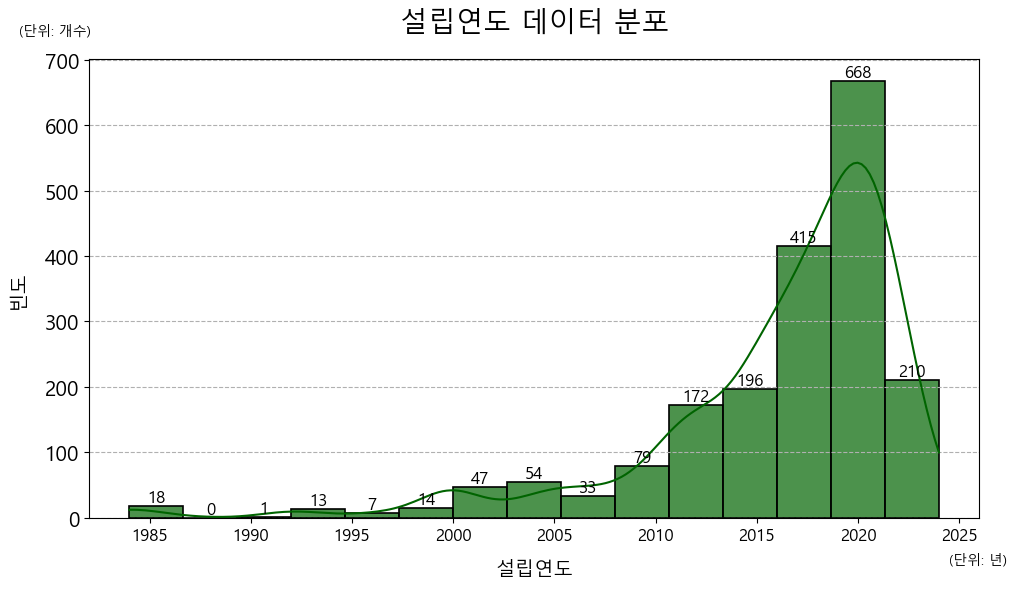

In [14]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 조정
hist = sns.histplot(data=data['설립연도'], bins=15, kde=True, color='darkgreen', edgecolor='black', linewidth=1.2, alpha=0.7)  # 히스토그램 스타일 설정
plt.xlabel('설립연도', fontsize=14, color='black', labelpad=12)  # x축 레이블 설정
plt.ylabel('빈도', fontsize=14, color='black', labelpad=12)  # y축 레이블 설정
plt.title('설립연도 데이터 분포', fontsize=20, color='black', pad=20)  # 제목 설정
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=15, color='black')  # y축 눈금 레이블 설정
plt.tight_layout()  # 그래프와 레이블 간격 조정
plt.grid(axis='y', linestyle='--')  # y축 격자 설정
plt.annotate('(단위: 년)', xy=(1, 0), xytext=(20, -35), xycoords='axes fraction', textcoords='offset points', ha='right', va='bottom', fontsize = 10)  # x축 단위 추가
plt.annotate('(단위: 개수)', xy=(0, 1), xytext=(-50, 25), xycoords='axes fraction', textcoords='offset points', ha='left', va='top', fontsize = 10)  # y축 단위 추가
# 막대 위에 빈도수 표시
for p in hist.patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
             fontsize=12, color='black', ha='center', va='bottom')
# 그래프를 이미지 파일로 저장
plt.savefig('설립연도 histogram.png', dpi=300, bbox_inches='tight')  # 이미지 파일로 저장 (dpi: 해상도, bbox_inches='tight': 그래프와 레이블이 잘린 부분을 제거)

plt.show()

### 사원수

In [15]:
emp_len1 = len(data2[(data2['사원수'] >= 0) & (data2['사원수'] < 100)])
emp_len2 = len(data2[(data2['사원수'] >= 100) & (data2['사원수'] < 200)])
emp_len3 = len(data2[(data2['사원수'] >= 200) & (data2['사원수'] < 300)])
emp_len4 = len(data2[(data2['사원수'] >= 300) & (data2['사원수'] < 400)])
emp_len5 = len(data2[(data2['사원수'] >= 400) & (data2['사원수'] < 500)])
emp_len6 = len(data2[(data2['사원수'] >= 500) & (data2['사원수'] < 100000)])

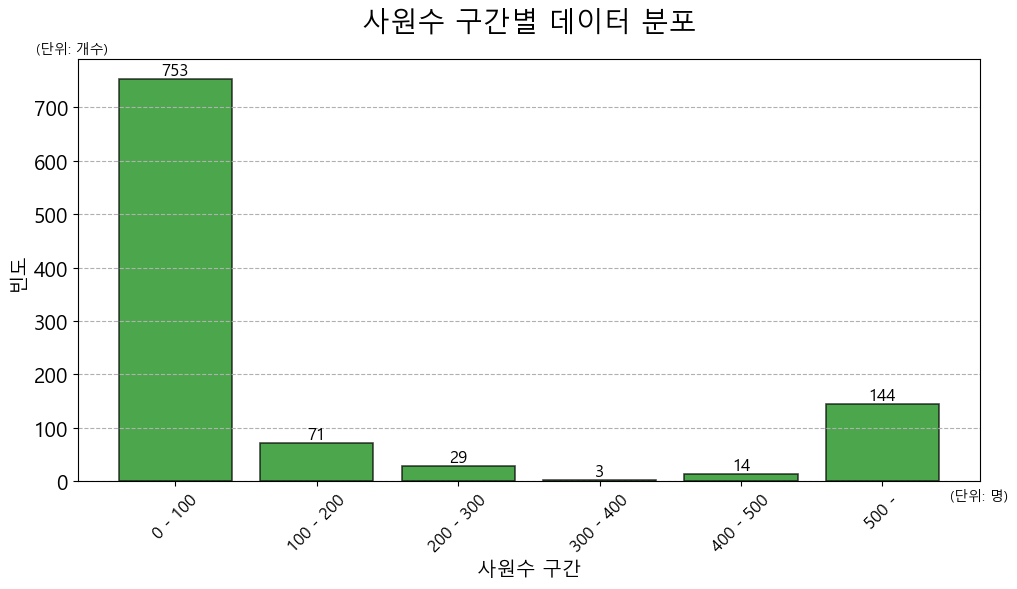

In [27]:
# 매출액 구간 (문자열로 표현)
categories = ['0 - 100', '100 - 200', '200 - 300', '300 - 400', '400 - 500', '500 -']
# 각 구간별 데이터 개수
counts = [emp_len1, emp_len2, emp_len3, emp_len4, emp_len5, emp_len6]

plt.figure(figsize=(10, 6))  # 그래프의 크기 설정
hist3 = plt.bar(categories, counts, color='green', edgecolor='black', linewidth=1.2, alpha=0.7)  # 막대 그래프 생성

plt.xlabel('사원수 구간', fontsize=14, color='black')
plt.ylabel('빈도', fontsize=14, color='black')
plt.title('사원수 구간별 데이터 분포', fontsize=20, color='black', pad=20)
plt.xticks(fontsize=12, color='black', rotation=45)  # x축 레이블 회전
plt.yticks(fontsize=15, color='black')
plt.grid(axis='y', linestyle='--')  # y축 격자 설정
plt.tight_layout()  # 그래프와 레이블 간격 조정
plt.annotate('(단위: 명)', xy=(1, 0), xytext=(20, -15), xycoords='axes fraction', textcoords='offset points', ha='right', va='bottom', fontsize = 10)  # x축 단위 추가
plt.annotate('(단위: 개수)', xy=(0, 1), xytext=(-30, 12), xycoords='axes fraction', textcoords='offset points', ha='left', va='top', fontsize = 10)  # y축 단위 추가
# 막대 위에 빈도수 표시
for p in hist3.patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
             fontsize=12, color='black', ha='center', va='bottom')
plt.savefig('사원수 barplot', dpi=300, bbox_inches='tight')
plt.show()

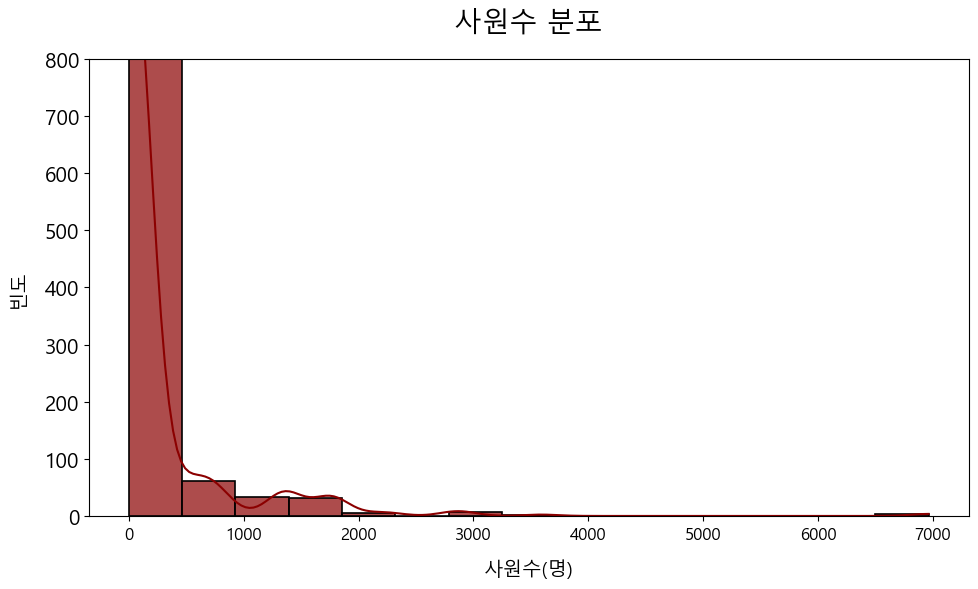

In [17]:
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 히스토그램 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 조정
sns.histplot(data=data['사원수'], bins=15, kde=True, color='darkred', edgecolor='black', linewidth=1.2, alpha=0.7)  # 히스토그램 스타일 설정
plt.xlabel('사원수(명)', fontsize=14, color='black', labelpad=12)  # x축 레이블 설정
plt.ylabel('빈도', fontsize=14, color='black', labelpad=12)  # y축 레이블 설정
plt.title('사원수 분포', fontsize=20, color='black', pad=20)  # 제목 설정
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=15, color='black')  # y축 눈금 레이블 설정
plt.tight_layout()  # 그래프와 레이블 간격 조정
plt.ylim(0, 800)
# 그래프를 이미지 파일로 저장
# plt.savefig('histogram.png', dpi=300, bbox_inches='tight')  # 이미지 파일로 저장 (dpi: 해상도, bbox_inches='tight': 그래프와 레이블이 잘린 부분을 제거)

plt.show()

### 직급

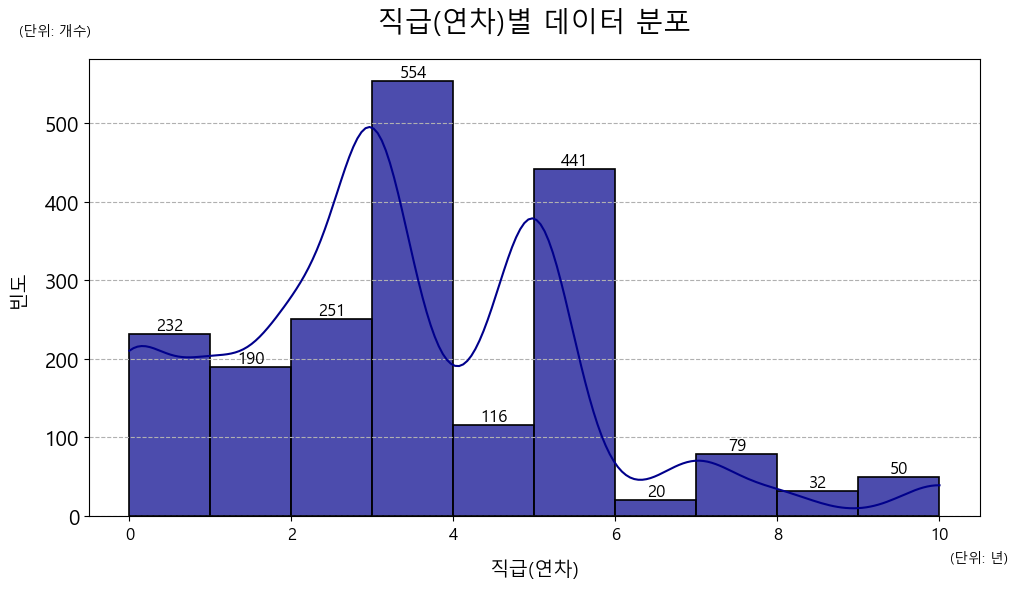

In [18]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 조정
hist5 = sns.histplot(data=data['직급'], bins=10, kde=True, color='darkblue', edgecolor='black', linewidth=1.2, alpha=0.7)  # 히스토그램 스타일 설정
plt.xlabel('직급(연차)', fontsize=14, color='black', labelpad=12)  # x축 레이블 설정
plt.ylabel('빈도', fontsize=14, color='black', labelpad=12)  # y축 레이블 설정
plt.title('직급(연차)별 데이터 분포', fontsize=20, color='black', pad=20)  # 제목 설정
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=15, color='black')  # y축 눈금 레이블 설정
plt.tight_layout()  # 그래프와 레이블 간격 조정
plt.grid(axis='y', linestyle='--')  # y축 격자 설정
plt.annotate('(단위: 년)', xy=(1, 0), xytext=(20, -35), xycoords='axes fraction', textcoords='offset points', ha='right', va='bottom', fontsize = 10)  # x축 단위 추가
plt.annotate('(단위: 개수)', xy=(0, 1), xytext=(-50, 25), xycoords='axes fraction', textcoords='offset points', ha='left', va='top', fontsize = 10)  # y축 단위 추가
# 막대 위에 빈도수 표시
for p in hist5.patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
             fontsize=12, color='black', ha='center', va='bottom')
# 그래프를 이미지 파일로 저장
plt.savefig('직급 histogram.png', dpi=300, bbox_inches='tight')  # 이미지 파일로 저장 (dpi: 해상도, bbox_inches='tight': 그래프와 레이블이 잘린 부분을 제거)

plt.show()

## 범주형
- columns = '기업명' , '업종분류', '기업형태', '주소'
    - 비율확인: barplot

### 기업명

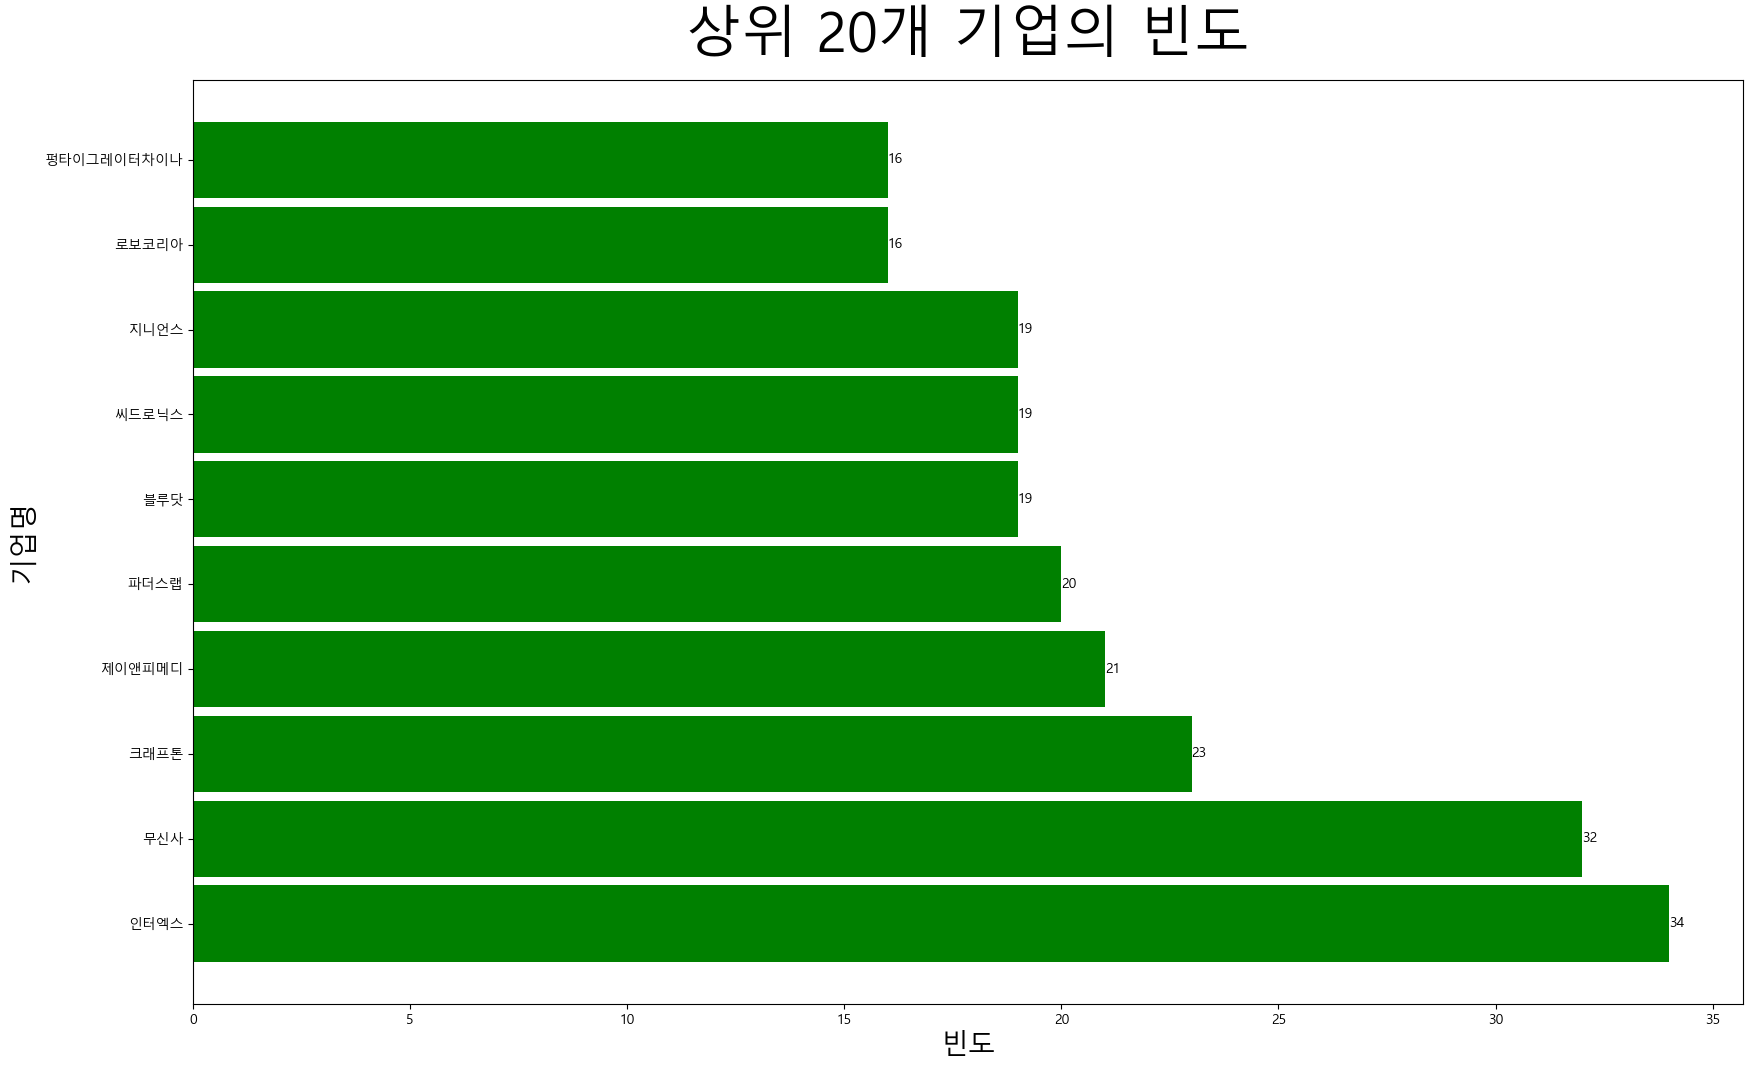

In [15]:
# 데이터의 기업명 빈도를 계산
company_counts = data['기업명'].value_counts()

# 상위 10개의 기업명 선택
top_companies = company_counts.head(10)

# 막대 그래프 그리기
plt.figure(figsize=(20, 12))
bars = plt.barh(top_companies.index, top_companies.values, color='green', height=0.9)  # 굵기를 조절하기 위해 height 매개변수 사용
plt.title('상위 20개 기업의 빈도', fontsize=40, color='black', pad=20)
plt.xlabel('빈도', fontsize=20, color='black')
plt.ylabel('기업명', fontsize=20, color='black')

# 그래프 위에 빈도 값을 표시합니다.
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width()):,}', va='center', ha='left', fontsize=10)

plt.show()

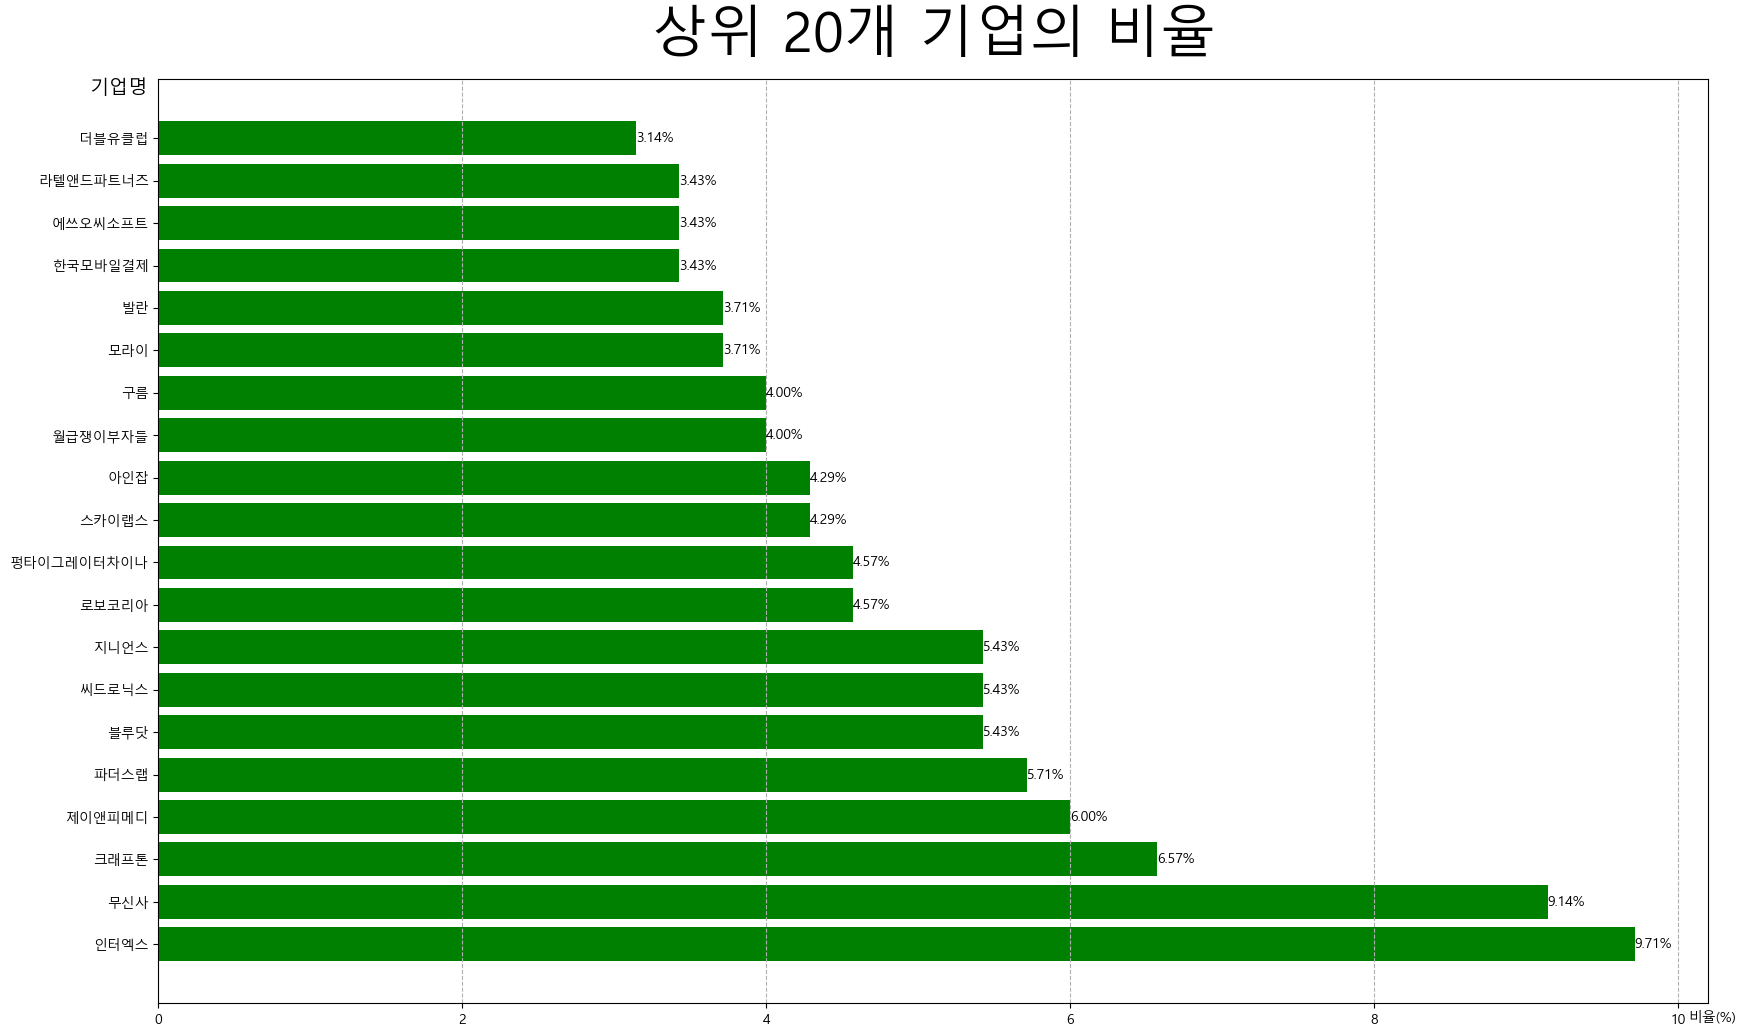

In [16]:
# 데이터의 기업명 빈도를 계산합니다. (예시로 임의의 데이터를 사용하였습니다.)
company_counts = data['기업명'].value_counts()

# 상위 몇 개의 기업명만 선택하고 싶은 경우 (예시에서는 상위 20개를 선택합니다.)
top_companies = company_counts.head(20)

# 전체 빈도의 합을 계산합니다.
total_frequency = top_companies.sum()

# 비율을 계산합니다.
ratios = (top_companies / total_frequency) * 100

# 막대 그래프를 그립니다.
plt.figure(figsize=(20, 12))
bars = plt.barh(ratios.index, ratios.values, color= 'green', linewidth=1)  # 막대의 굵기를 2로 설정합니다.

# 막대 그래프의 레이블을 설정합니다.
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{ratios[i]:.2f}%', va='center')

plt.title('상위 20개 기업의 비율', fontsize=40, color='black', pad=20)
plt.annotate('비율(%)', xy=(1, 0), xytext=(20, -15), xycoords='axes fraction', textcoords='offset points', ha='right', va='bottom', fontsize = 10)  # x축 단위 추가
plt.annotate('기업명', xy=(0, 1), xytext=(-50, 0), xycoords='axes fraction', textcoords='offset points', ha='left', va='top', fontsize = 14)  # y축 단위 추가
plt.grid(axis='x', linestyle='--')
# 그래프를 이미지 파일로 저장
plt.savefig('상위 20개 기업의 비율.png', dpi=300, bbox_inches='tight')  # 이미지 파일로 저장 (dpi: 해상도, bbox_inches='tight': 그래프와 레이블이 잘린 부분을 제거)
plt.show()

### 업종분류

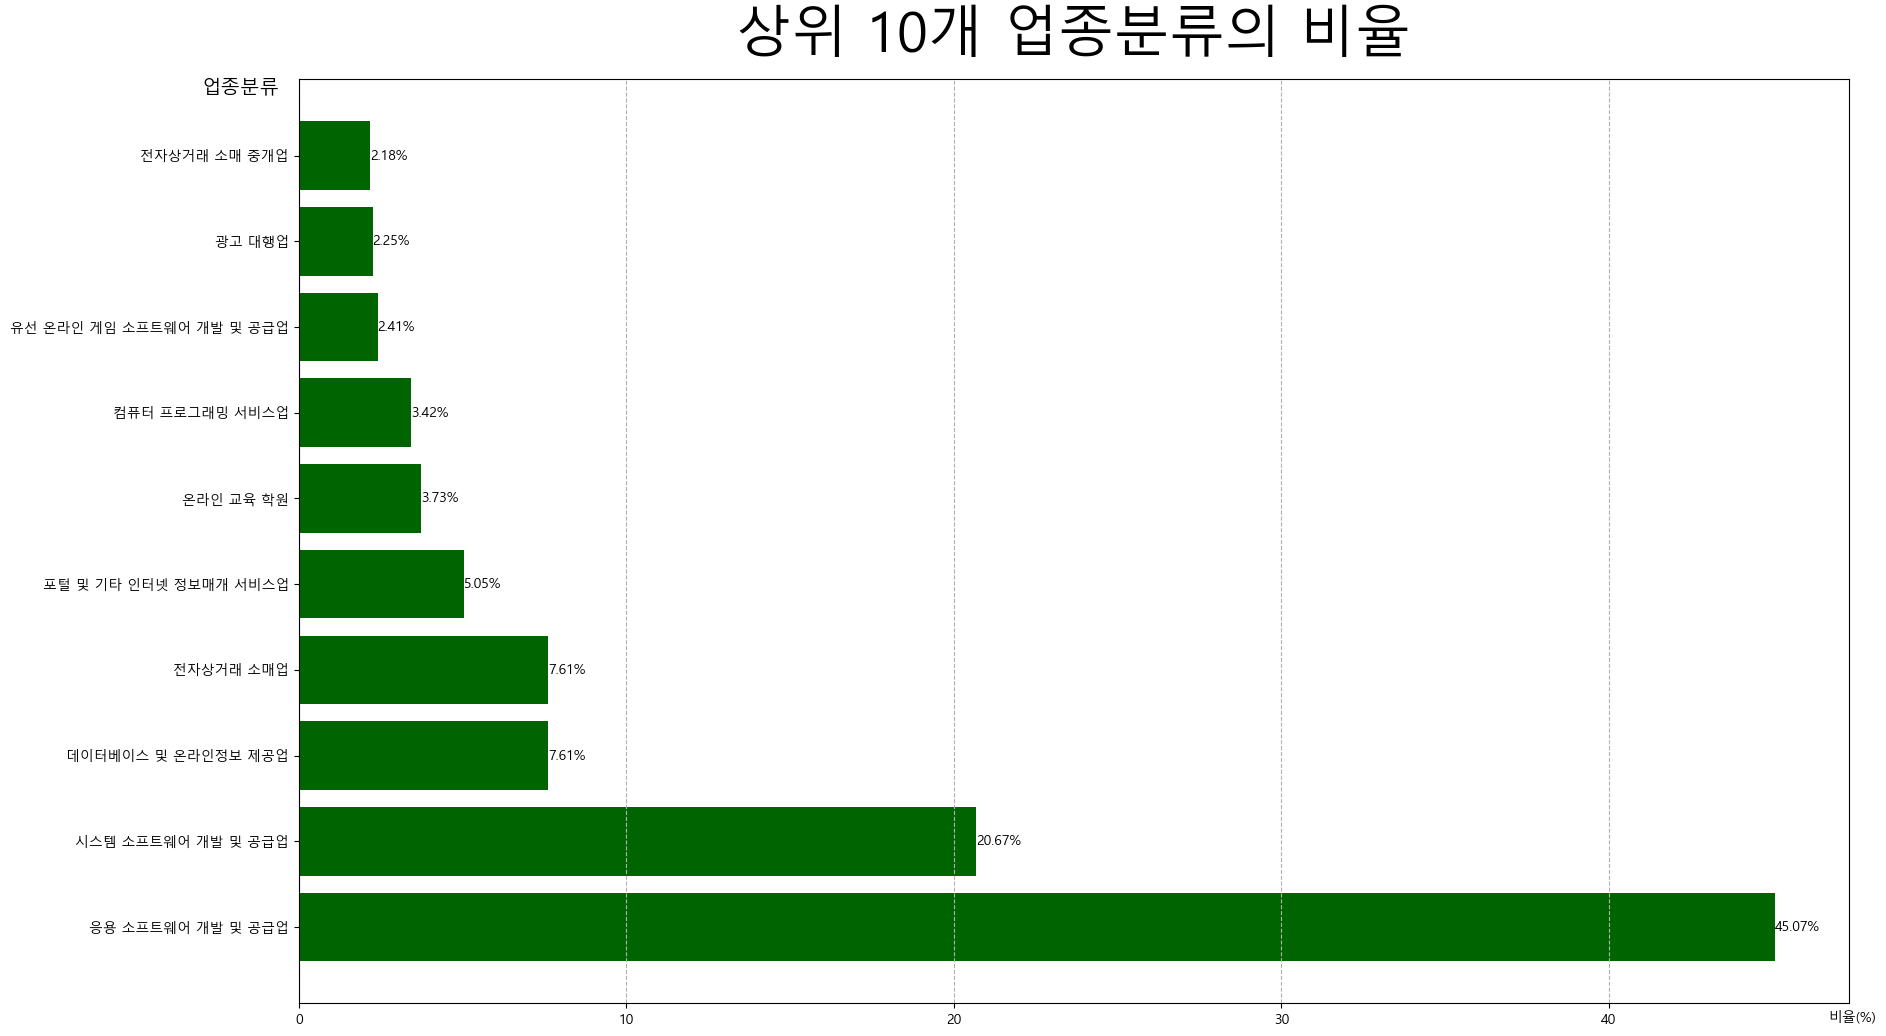

In [17]:
# 데이터의 업종분류 빈도 계산
company_counts = data['업종분류'].value_counts()

# 상위 10개 기업명 선택
top_companies = company_counts.head(10)

# 전체 빈도의 합 계산
total_frequency = top_companies.sum()

# 비율 계산
ratios = (top_companies / total_frequency) * 100

# 막대 그래프 그리기
plt.figure(figsize=(20, 12))
bars = plt.barh(ratios.index, ratios.values, color= 'darkgreen', linewidth= 0.1)  # 막대의 굵기를 2로 설정합니다.

# 그래프 꾸미기
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{ratios[i]:.2f}%', va='center')

plt.title('상위 10개 업종분류의 비율', fontsize=40, color='black', pad=20)
plt.annotate('비율(%)', xy=(1, 0), xytext=(20, -15), xycoords='axes fraction', textcoords='offset points', ha='right', va='bottom', fontsize = 10)  # x축 단위 추가
plt.annotate('업종분류', xy=(0, 1), xytext=(-70, 0), xycoords='axes fraction', textcoords='offset points', ha='left', va='top', fontsize = 14)  # y축 단위 추가
plt.grid(axis='x', linestyle='--')
plt.savefig('상위 10개 업종분류의 비율.png', dpi=300, bbox_inches='tight')
plt.show()

### 주소

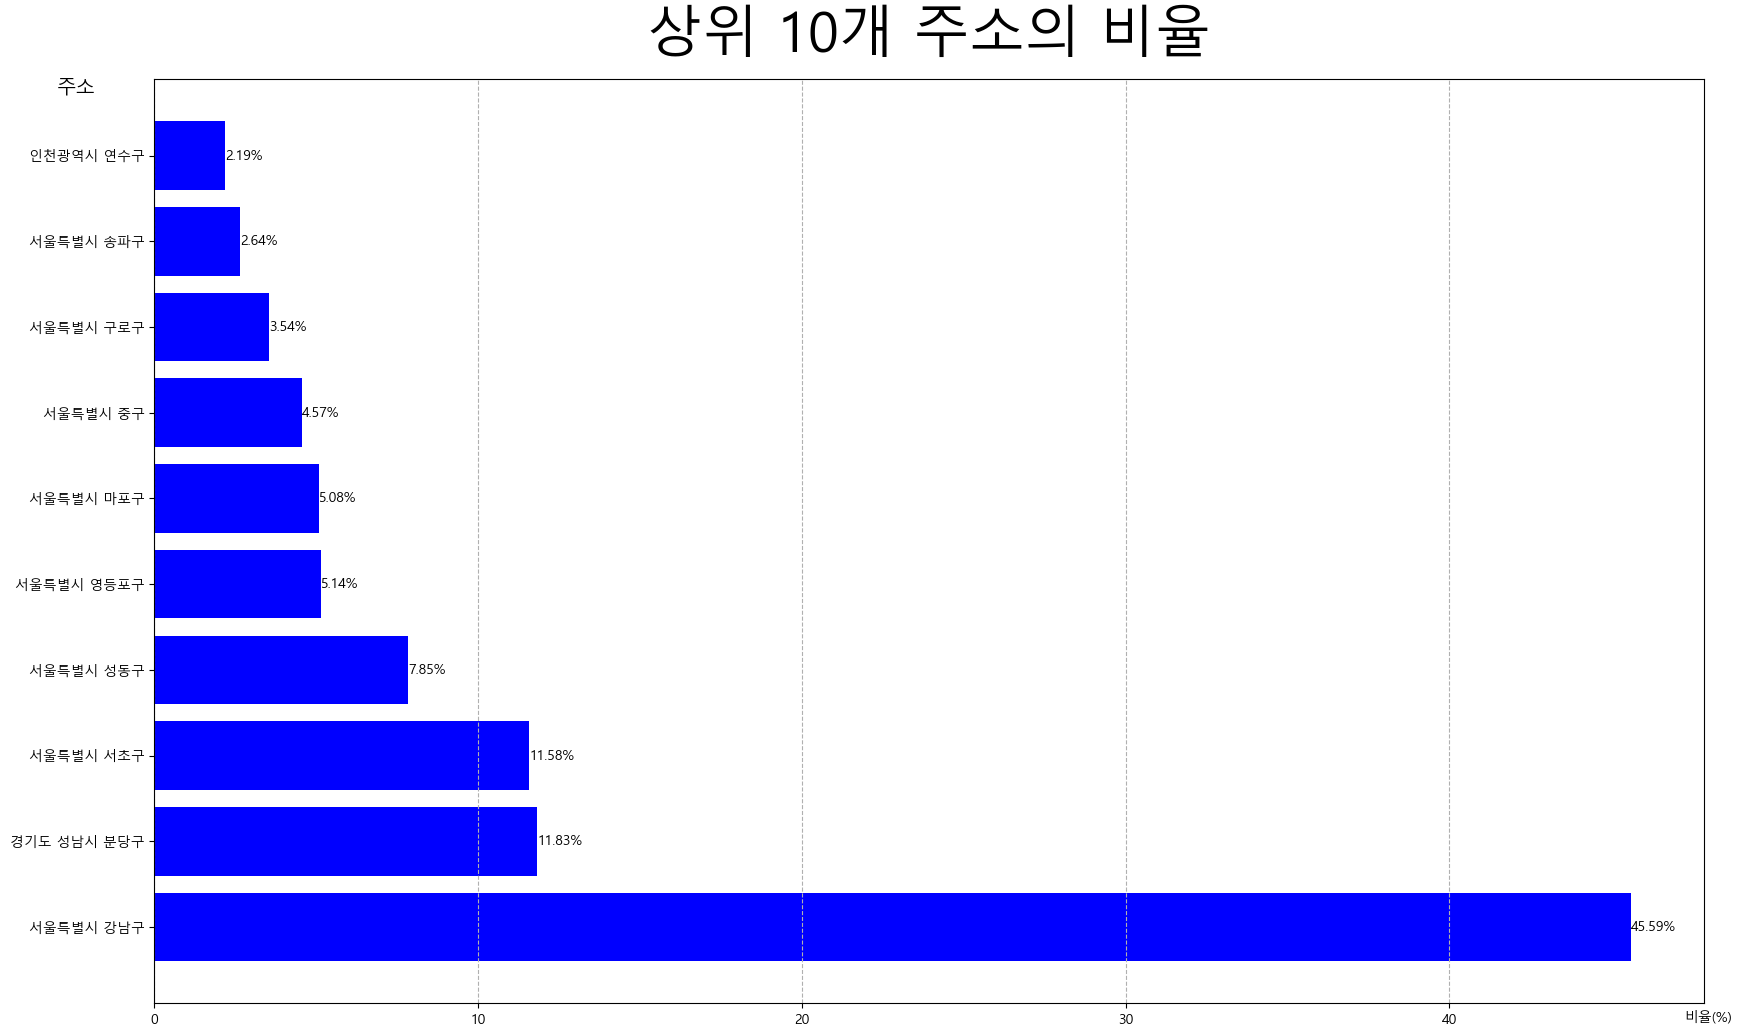

In [18]:
# 데이터의 주소 빈도 계산
company_counts = data['주소'].value_counts()

# 상위 10개 기업명 선택
top_companies = company_counts.head(10)

# 전체 빈도의 합 계산
total_frequency = top_companies.sum()

# 비율 계산
ratios = (top_companies / total_frequency) * 100

# 막대 그래프 그리기
plt.figure(figsize=(20, 12))
bars = plt.barh(ratios.index, ratios.values, color= 'blue', linewidth= 0.1)  # 막대의 굵기를 2로 설정합니다.

# 그래프 꾸미기
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{ratios[i]:.2f}%', va='center')

plt.title('상위 10개 주소의 비율', fontsize=40, color='black', pad=20)
plt.annotate('비율(%)', xy=(1, 0), xytext=(20, -15), xycoords='axes fraction', textcoords='offset points', ha='right', va='bottom', fontsize = 10)  # x축 단위 추가
plt.annotate('주소', xy=(0, 1), xytext=(-70, 0), xycoords='axes fraction', textcoords='offset points', ha='left', va='top', fontsize = 14)  # y축 단위 추가
plt.grid(axis='x', linestyle='--')
plt.savefig('상위 10개 주소의 비율.png', dpi=300, bbox_inches='tight')
plt.show()

### 기업형태

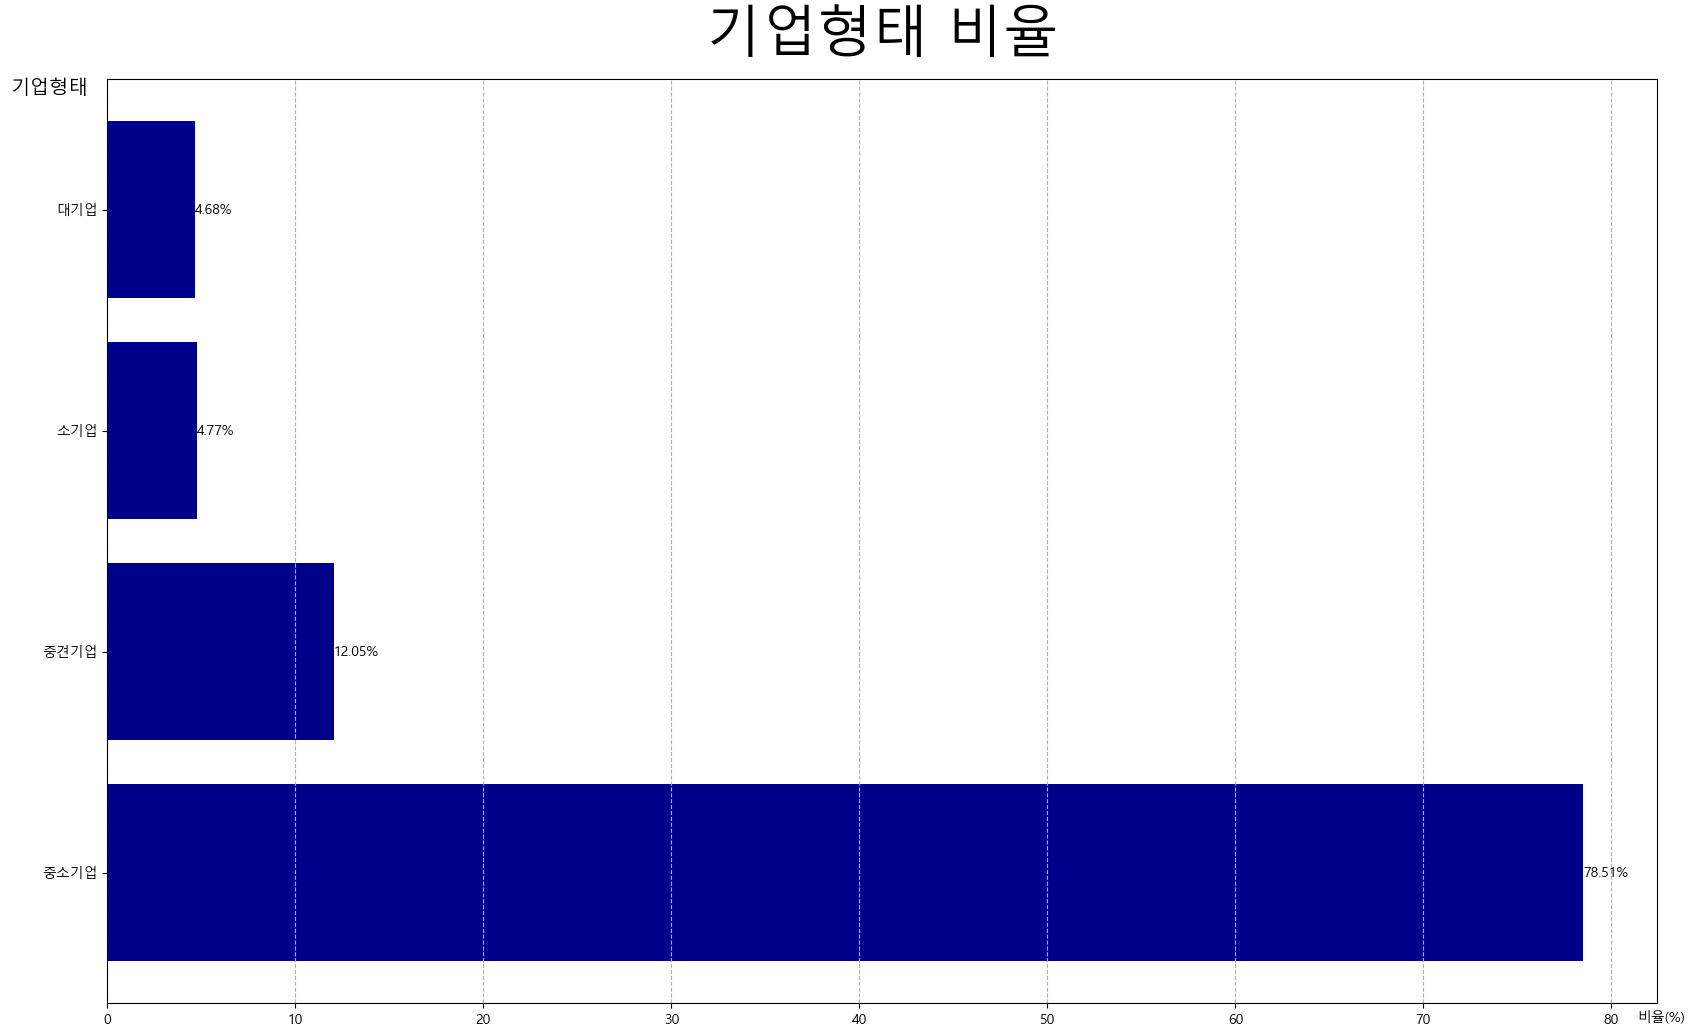

In [19]:
# 데이터의 기업형태 빈도 계산
company_counts = data['기업형태'].value_counts()

# 상위 10개 기업명 선택
top_companies = company_counts

# 전체 빈도의 합 계산
total_frequency = top_companies.sum()

# 비율 계산
ratios = (top_companies / total_frequency) * 100

# 막대 그래프 그리기
plt.figure(figsize=(20, 12))
bars = plt.barh(ratios.index, ratios.values, color= 'darkblue', linewidth= 0.1)  # 막대의 굵기를 2로 설정합니다.

# 그래프 꾸미기
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{ratios[i]:.2f}%', va='center')

plt.title('기업형태 비율', fontsize=40, color='black', pad=20)
plt.annotate('비율(%)', xy=(1, 0), xytext=(20, -15), xycoords='axes fraction', textcoords='offset points', ha='right', va='bottom', fontsize = 10)  # x축 단위 추가
plt.annotate('기업형태', xy=(0, 1), xytext=(-70, 0), xycoords='axes fraction', textcoords='offset points', ha='left', va='top', fontsize = 14)  # y축 단위 추가
plt.grid(axis='x', linestyle='--')
plt.savefig('기업형태 비율bar.png', dpi=300, bbox_inches='tight')
plt.show()

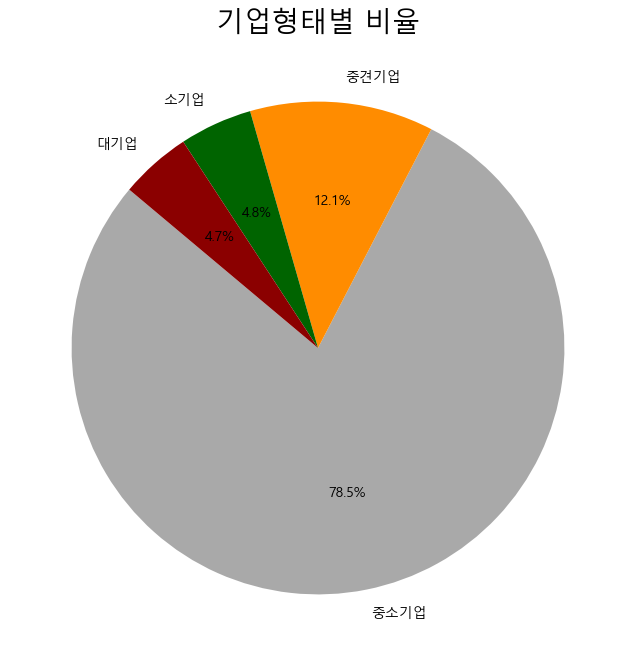

In [24]:
# '기업형태' 컬럼의 값에 따른 개수 계산
counts = data['기업형태'].value_counts()

# 색상 지정
colors = ['darkgray', 'darkorange', 'darkgreen', 'darkred']

# 파이 차트로 시각화
plt.figure(figsize=(8, 8))  # 차트의 크기 설정
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('기업형태별 비율', fontsize=20)
plt.savefig('기업형태 비율pie.png', dpi=300, bbox_inches='tight')
plt.show()

## 워드클라우드
- columns = '직무', '자격요건', '이용하는기술스택/우대사항'

In [5]:
sns.set_theme(style="darkgrid")

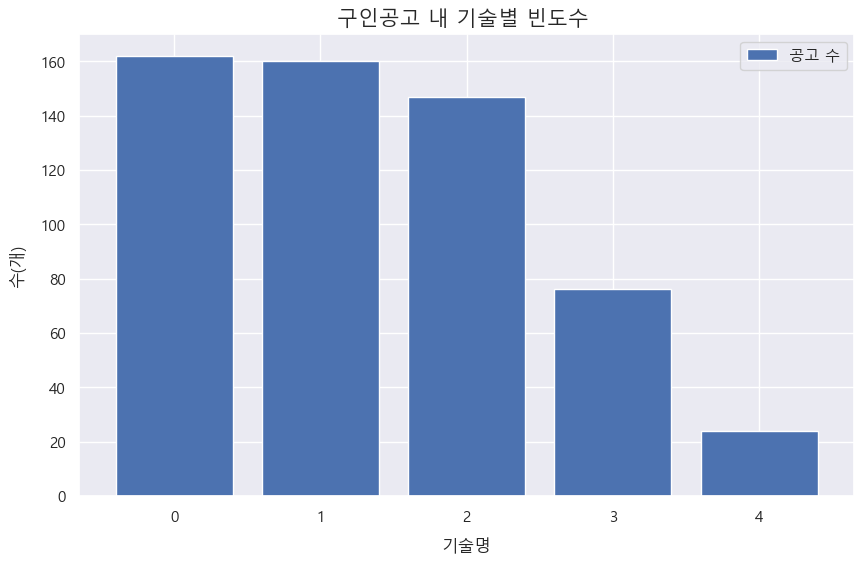

In [6]:
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 데이터프레임 생성
data_1 = pd.DataFrame({
    '기술': ['Docker', 'DevOps', 'Kubernetes', 'Container', 'Amazon EKS'],
    '공고 수': [162, 160, 147, 76,  24]
})

# 폰트 설정
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 바 플롯 그리기
ax = data_1.plot(kind='bar', figsize=(10, 6), rot=0, width=0.8)

# x축 레이블과 y축 레이블 추가
plt.title('구인공고 내 기술별 빈도수 ', fontsize=15)
ax.set_xlabel('기술명', labelpad=10)
ax.set_ylabel('수(개)', rotation=90, labelpad=10)

# x축 눈금 레이블 설정

# 그래프 보이기
plt.show()

In [ ]:
빈도 높은 순서별 시각화 및 키워드 빈도 순위